Part A: Question 1 

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('gapminder.csv')

country	year	infant_mortality	life_expectancy	fertility	population	gdp	continent	region

In [4]:
def percapGDP(c, y):
    pop = df.loc[(df.country == c) & (df.year == y), 'population']
    gdp = df.loc[(df.country == c) & (df.year == y), 'gdp']
    gdpcap = gdp/pop
    return(gdpcap.iloc[0])

In [5]:
percapGDP('Ireland', 2000)

25386.587190302726

In [6]:
percapGDP("India", 1987)

276.015937078038

In [7]:
percapGDP("France", 1972)

12795.976099496562

In [8]:
percapGDP("Tunisia", 2015)

nan

Part A: Question 2

In [111]:
def percapGDPdict(y):
    Year = df[(df['year'] == y)]
    GDPdict = dict()
    for index, row in Year.iterrows():
        c = row['country']
        GDP = row['gdp']
        pop = row['population']
        GDPop = GDP/pop
        GDPdict[c] = (GDPop)
    return(GDPdict)
        
   

In [112]:
percapdgp = percapGDPdict(1987)
percapdgp['Tunisia']



1602.2474981949356

In [113]:
percapdgp['India']

276.015937078038

In [114]:
percapdgp['France']

17416.949098161764

Part A: Question 3

In [115]:
def my_plot(year, con, x, y):
    df_temp = df[(df.year == year) & (df.continent == con)]
    plt.plot(df_temp[x], df_temp[y], '.')

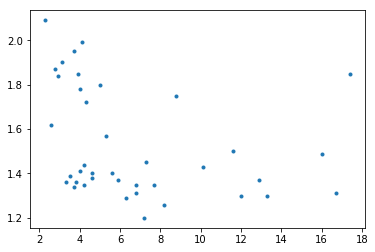

In [116]:
my_plot(2006, 'Europe', 'infant_mortality', 'fertility')

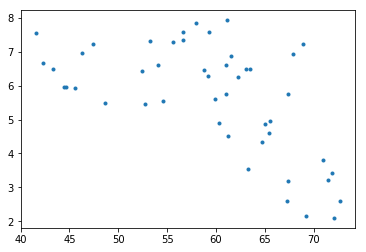

In [117]:
my_plot(1970, 'Asia', 'life_expectancy', 'fertility')

In [11]:
df['capgdp'] = df['gdp']/df['population']

Part B 
I wanted to investigate a phenomenon known as the resource curse where resource rich countries tend to be outperformed, both economically and developmentally, by countries with less resources. I wanted to see if I could spot this trend and decided to focus on infant mortality. The hypothesis put foreward to expalin why resource rich countries would have worse infant mortality rates is that in resource rich countries money can be collected indepedant of taxes and so they are less depedant on the population for money. Therefore there is less incentive to seek the pro economic growth benifits that come from improved health care. My plan was to select a few resource rich countries as case studies and see if their infant mortality rates would be higher than expected or if their rate of change would be slower. I decided that I'd narrow my scope by looking at countries that were rich in oil, countries that earned a high percentage of their GDP through selling oil, and by looking exclusively at African countries. So I choose Gabon, Nigeria, Algeria, Angola as my examples as they consistently earned significant amounts (>15%) of their GDP through oil rents. 

In [12]:
gregion = df.groupby(['region', 'year'])
gcontinent = df.groupby(['continent', 'year'])

In [13]:
Africa_infant_mortality = gcontinent.apply(lambda x: np.average(x['infant_mortality'], weights = x['population']))
df_im = Africa_infant_mortality.unstack(level=0)

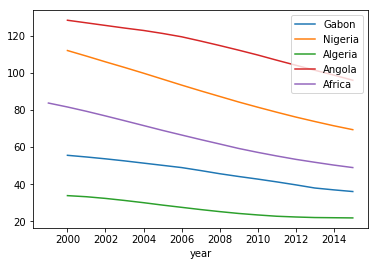

In [28]:
countries = ['Gabon', 'Nigeria', 'Algeria', 'Angola']
df_list = [df[(df.country == c) & (df.year > 1999)][['year', 'infant_mortality']].
           rename(columns={'infant_mortality': c}).
           set_index('year') for c in countries]  
df_list.append(df_im['Africa'].loc[1999:])
Africa_countries = pd.concat(df_list, axis=1)
Africa_countries.plot()



In [128]:
def percentchange(c):
    percent_chanage = 100*((df[(df.country == c) & (df.year == 2015)]['infant_mortality'].iloc[0]) - (df[(df.country == c) & (df.year == 2000)]['infant_mortality'].iloc[0])) /(df[(df.country == c) & (df.year == 2000)]['infant_mortality'].iloc[0])
    print(c, percent_chanage)
percentchange('Gabon')
percentchange('Nigeria')
percentchange('Algeria')
percentchange('Angola')
per_decrease_africa = 100*(((df_im['Africa'].loc[2015])-(df_im['Africa'].loc[2000]))/(df_im['Africa'].loc[2000]))
print('Africa', per_decrease_africa)
#Finding the percentage change of IM (current rate - previous rate/ previous rate)

Gabon -35.07194244604317
Nigeria -38.03571428571428
Algeria -35.39823008849557
Angola -25.17537022603274
Africa -39.9623332557825


I first decided to compare the countries to the average rate of infant mortality across Africa. The rates of infant mortality  were placed pretty evenl around the mean. The rates of change were worse than average which is perhaps suggestive.    

In [129]:
region_im = gregion.apply(lambda x: np.average(x['infant_mortality'], weights = x['population'])).unstack(level=0)



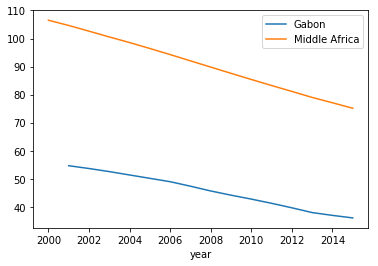

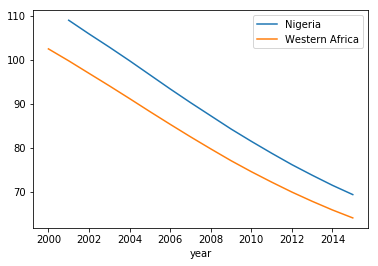

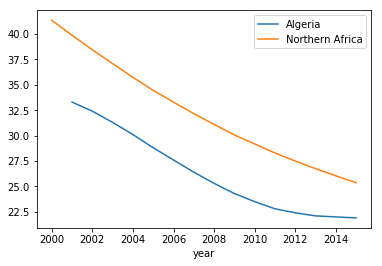

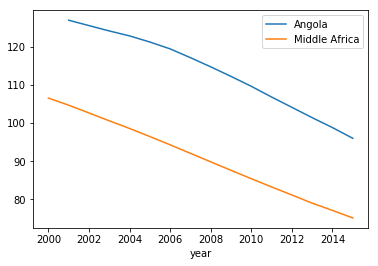

In [130]:
countries = [['Gabon'], ['Nigeria'], ['Algeria'], ['Angola']]
for lists in countries:
    for c in lists:
        df_country = [df[(df.country == c) & (df.year > 2000)][['year', 'infant_mortality']].
           rename(columns={'infant_mortality': c}).
           set_index('year') for c in lists] 
        df_country.append(region_im[(df.loc[(df.country == c) & (df.year == 2000), 'region'].iloc[0])].loc[2000:])
        africian_region = pd.concat(df_country, axis=1)
        africian_region.plot()        

In [131]:
percentchange('Gabon')
percentchange('Nigeria')
percentchange('Algeria')
percentchange('Angola')
def per_change_region(reg):
    change = 100*(((region_im[reg].loc[2015])-(region_im[reg].loc[2000]))/(region_im[reg].loc[2000]))
    print(reg , change)
per_change_region('Middle Africa')
per_change_region('Western Africa')
per_change_region('Northern Africa')

Gabon -35.07194244604317
Nigeria -38.03571428571428
Algeria -35.39823008849557
Angola -25.17537022603274
Middle Africa -29.442898832468025
Western Africa -37.45890736770187
Northern Africa -38.66529017775356


Having seen them compared to Africa I wanted to see them compared to their region more specifically. The results were largely the same as with the first graph though the added context did make some things clearer, Nigeria's rate for example was far less dramatic than is seemed initially. Also, in comparition to their regions the percentage decreases looked better on the whole. I decided that there might be other factors interfering with the results and if I could control for them I would get more conclusive results. The first variable I decided to fix was gdp. I used world banks classificiation of income to sort the countries.

In [132]:
years = [year for year in range(2000,2016)]
lowgdpcap = [755, 745, 735, 765, 825, 875, 905, 935, 975, 995, 1005, 1025, 1030, 1045, 1045, 1025]
low_income = dict(zip(years, lowgdpcap))
lowmidgdpcap = [2995, 2975, 2935, 3035,3255,3465,3595,3705,3855,3945,3975,4035,4085,4125,4125,4035]
lowmid_income = dict(zip(years, lowmidgdpcap))
uppermidgdpcap = [9265, 9205, 9075, 9385, 10065,10725,11115,11455,11905,12195,12275,12475,12615,12745,12730,12475]
uppermid_income = dict(zip(years, uppermidgdpcap))
#Here I've created 3 dictionaries with the different thresholds for the category’s

In [20]:
df['gdpcap'] = df['gdp']/df['population']
df['income_level'] = 0
Years = df[(df['year'] >= 2000) & (df['year'] < 2016)]
for index, row in Years.iterrows():
    if row['gdpcap'] <= low_income[row.year]:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'income_level'] = 'low'
    elif row['gdpcap'] > low_income[row.year] and row['gdpcap'] <= lowmid_income[row.year]:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'income_level'] = 'lowmid'
    elif row['gdpcap'] > lowmid_income[row.year] and row['gdpcap'] <= uppermid_income[row.year]:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'income_level'] = 'uppermid'
    else:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'income_level'] = 'high'
#Iterating through all the rows from 2000 through 2016 and assigning values to a new column I've created based on what their gdp is 
# in the worlds bank system. Depending on the year the thresholds are different and so I use the dictionaries I've created to adjust for that. 

In [21]:
grouped_income = df.groupby(['income_level', 'year'])
df_africa = df.loc[df.continent == 'Africa']
grouped_income_africa = df_africa.groupby(['income_level', 'year'])
grouped_income_im = grouped_income.apply(lambda x: np.average(x['infant_mortality'], weights = x['population'])).unstack(level=0)
grouped_income_im_africa = grouped_income_africa.apply(lambda x: np.average(x['infant_mortality'], weights = x['population'])).unstack(level=0)

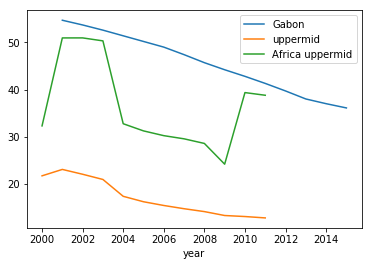

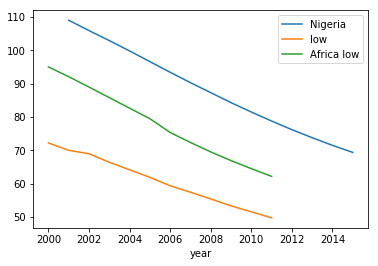

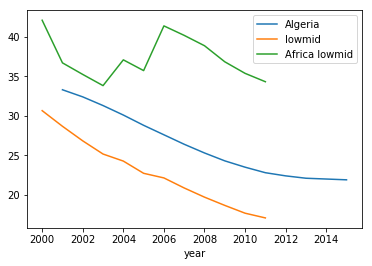

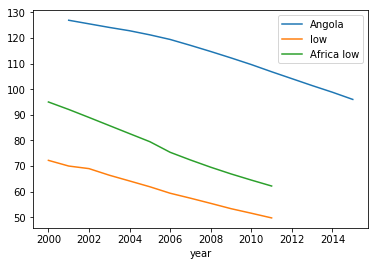

In [109]:
countries = [['Gabon'], ['Nigeria'], ['Algeria'], ['Angola']]
for lists in countries:
    for c in lists:
        df_country = [df[(df.country == c) & (df.year > 2000)][['year', 'infant_mortality']].rename(columns={'infant_mortality': c}).set_index('year') for c in lists] 
        if (df.loc[(df.year == 2000) & (df.country == c), 'income_level'] == 'low').bool():
             df_country.append(grouped_income_im['low'])
             df_country.append(grouped_income_im_africa['low'].rename("Africa low"))
        elif (df.loc[(df.year == 2000) & (df.country == c), 'income_level'] == 'lowmid').bool():
             df_country.append(grouped_income_im['lowmid'])
             df_country.append(grouped_income_im_africa['lowmid'].rename("Africa lowmid"))
        elif (df.loc[(df.year == 2000) & (df.country == c), 'income_level'] == 'uppermid').bool():
             df_country.append(grouped_income_im['uppermid'])
             df_country.append(grouped_income_im_africa['uppermid'].rename("Africa uppermid"))
        else:
            df_country.append(grouped_income_im['high'])
        income_level_IM = pd.concat(df_country, axis=1)
        plot_income = income_level_IM.plot()
        

        

When you control for income the results seem to be more in favour of the original hypothesis, three out of the four countries  have above average IM rates for compared to Africian countries and all have them have above average rates compared to countries of correesponding incomes across the world. This is infitting with the suggested the 'resource curse' theory, for the amount of money they have they invest less than average in public health and so their health indicators will be worse. 
The next variable I want to control for is infant mortality itself, I want to see if these countries growth rates are less than other countries with similar IM rates. 

In [69]:
def infant_mortality_quartiles(y):
    column = df.loc[(df['year'] == 2000), 'infant_mortality']
    qaurtile1 = column.quantile(.25)
    quartile2 = column.quantile(.5)
    quartile3 = column.quantile(.75)
    quartile4= column.quantile(1)
    return([qaurtile1, quartile2, quartile3, quartile4])
#This is a function that splits the IM rates for a given year into quartiles
        
    

In [77]:
years = [year for year in range(2000,2016)]
im_quartile_dict = dict(zip(years, [infant_mortality_quartiles(y) for y in years]))
#This creates a dictionary that has the years as the keys and a list of the four IM quartiles as the result

In [78]:
df['im_level'] = 0
Years = df[(df['year'] >= 2000) & (df['year'] < 2016)]
for index, row in Years.iterrows():
    if row['infant_mortality'] <= im_quartile_dict[row.year][0]:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'im_level'] = 'low'
    elif row['infant_mortality'] > im_quartile_dict[row.year][0] and row['infant_mortality'] <= im_quartile_dict[row.year][1]:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'im_level'] = 'lowmid'
    elif row['infant_mortality'] > im_quartile_dict[row.year][1] and row['infant_mortality'] <= im_quartile_dict[row.year][2]:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'im_level'] = 'uppermid'
    else:
        df.at[(df.country == row['country']) & (df.year == row['year']), 'im_level'] = 'high'
#Categorising countries according to which quartile they're in

In [133]:
grouped_im_level = df.groupby(['im_level', 'year'])
df_africa = df.loc[df.continent == 'Africa']
grouped_im_level_africa = df_africa.groupby(['im_level', 'year'])
grouped_level_im = grouped_im_level.apply(lambda x: np.average(x['infant_mortality'], weights = x['population'])).unstack(level=0)
grouped_level_im_africa = grouped_im_level_africa.apply(lambda x: np.average(x['infant_mortality'], weights = x['population'])).unstack(level=0)

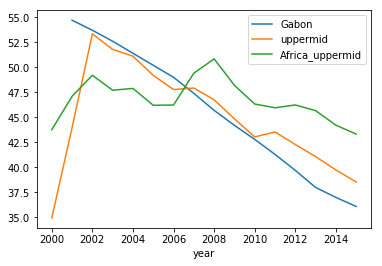

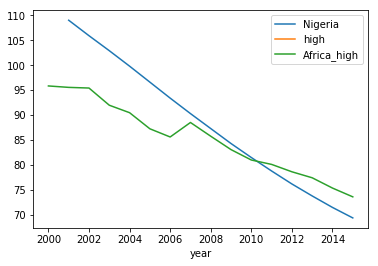

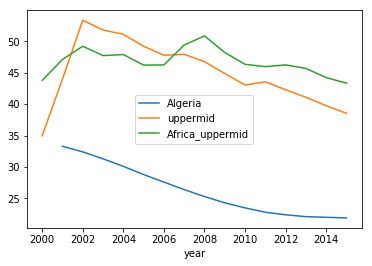

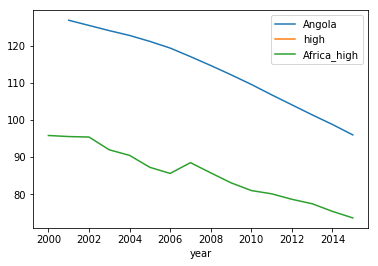

In [134]:
countries = [['Gabon'], ['Nigeria'], ['Algeria'], ['Angola']]
for lists in countries:
    for c in lists:
        df_country = [df[(df.country == c) & (df.year > 2000)][['year', 'infant_mortality']].rename(columns={'infant_mortality': c}).set_index('year') for c in lists] 
        if (df.loc[(df.year == 2000) & (df.country == c), 'im_level'] == 'low').bool():
             df_country.append(grouped_level_im['low'])
             df_country.append(grouped_level_im_africa['low'].rename("Africa_low"))
        elif (df.loc[(df.year == 2000) & (df.country == c), 'im_level'] == 'lowmid').bool():
             df_country.append(grouped_level_im['lowmid'])
             df_country.append(grouped_level_im_africa['lowmid'].rename("Africa_lowmid"))
        elif (df.loc[(df.year == 2000) & (df.country == c), 'im_level'] == 'uppermid').bool():
             df_country.append(grouped_level_im['uppermid'])
             df_country.append(grouped_level_im_africa['uppermid'].rename("Africa_uppermid"))
        else:
            df_country.append(grouped_level_im['high'])
            df_country.append(grouped_level_im_africa['high'].rename("Africa_high"))
        im_level_IM = pd.concat(df_country, axis=1)
        im_level_IM.plot()


In [125]:
percentchange('Gabon')
percentchange('Nigeria')
percentchange('Algeria')
percentchange('Angola')
def per_change_im(level):
    change = 100*(((grouped_level_im_africa[level].loc[2015])-(grouped_level_im_africa[level].loc[2002]))/(grouped_level_im_africa[level].loc[2002]))
    print(level , change)
per_change_im('high')
per_change_im('uppermid')
    

Gabon -35.07194244604317
Nigeria -38.03571428571428
Algeria -35.39823008849557
Angola -25.17537022603274
high -22.84280840914132
uppermid -11.940100457007809


These results show that compared to other countries of similar IM rates the case study countries have above average percentage decrease. 